## Just for Analysis Purpose:

Figuring out how tokens are getting used up in different reviews

In [15]:
from tester import *
from learning import *

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
titles = [yup[i]['title'] for i in range(50)]
json.dump(titles, open("test_titles.json","w"))

NameError: name 'yup' is not defined

In [4]:
data = json.load(open("peer_review_outputs_new.json"))
data[0]

{'title': 'REWARD-FREE CURRICULA FOR TRAINING ROBUST WORLD MODELS',
 'abstract': 'There has been a recent surge of interest in developing generally-capable agents that can adapt to new tasks without additional training in the environment. Learning world models from reward-free exploration is a promising approach, and enables policies to be trained using imagined experience for new tasks. However, achieving a general agent requires robustness across different environments. In this work, we address the novel problem of generating curricula in the reward-free setting to train robust world models. We consider robustness in terms of minimax regret over all environment instantiations and show that the minimax regret can be connected to minimising the maximum error in the world model across environment instances. This result informs our algorithm, WAKER: Weighted Acquisition of Knowledge across Environments for Robustness. WAKER selects environments for data collection based on the estimated 

In [9]:
data = json.load(open("checkpoints/check4.0.json"))
len(data)

12

In [10]:
without_z = [a['output_without']['z_score'] for a in data]
with_z = [a['output_with']['z_score'] for a in data]

without_green = [a['output_without']['green_fraction'] for a in data]
with_green = [a['output_with']['green_fraction'] for a in data]

without_p = [a['output_without']['p_value'] for a in data]
with_p = [a['output_with']['p_value'] for a in data]

In [11]:
len(without_green)

12

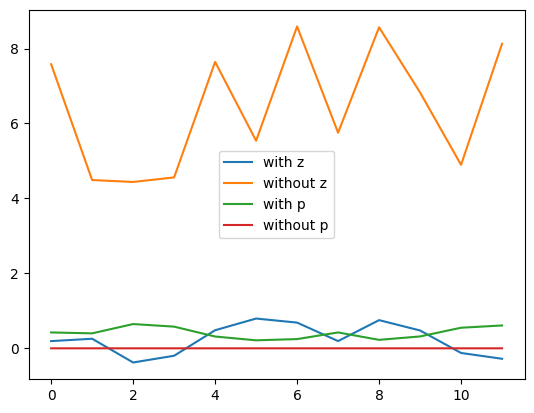

In [12]:
plt.plot(np.linspace(0, len(with_z)-1, len(with_z)), with_z,label="with z")
plt.plot(np.linspace(0, len(without_z)-1, len(without_z)), without_z, label="without z")

plt.plot(np.linspace(0, len(with_p)-1, len(with_p)), with_p,label="with p")
plt.plot(np.linspace(0, len(without_p)-1, len(without_p)), without_p,label="without p")
plt.legend()

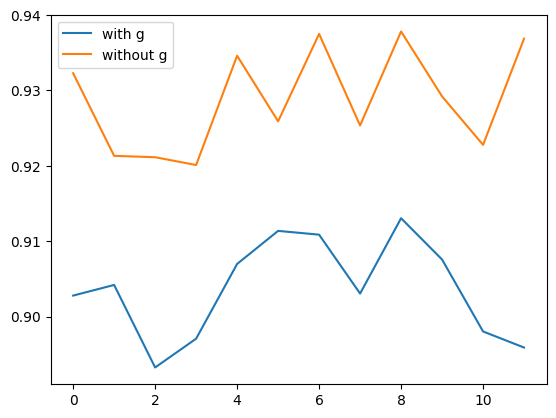

In [13]:
plt.plot(np.linspace(0, len(with_green)-1, len(with_green)), with_green, label="with g")
plt.plot(np.linspace(0, len(without_green)-1, len(without_green)), without_green, label="without g")
plt.legend()

In [10]:
run_all == True
if run_all==True:
    read_file = read_json.read_old()
else:
    read_file = read_json.data

type(read_file)

100%|██████████| 546/546 [00:00<00:00, 1885.78it/s]


list

In [16]:
args = parse_args()
# print(args)
# if args.ppl:
#     testppl(args)
# else:
#     main(args)
args.model_name_or_path = "meta-llama/Llama-3.2-3B-Instruct"
args.max_new_tokens = 2000
args.min_new_tokens = 5
args.gamma = 0.9
args.attack_ep = 0.1

device = torch.device('cpu')
model = AutoModelForCausalLM.from_pretrained(args.model_name_or_path, torch_dtype=torch.float16)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path)

Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]
